### Market Segmentation On Ev Statistics In India : 

### By Krisi Doshi

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [107]:
df = pd.read_csv('EV_India.csv')
df

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"
5,6,Chandigarh,2812,"7,46,881","7,49,693"
6,7,Chhattisgarh,20966,"68,36,200","68,57,166"
7,8,Delhi,"1,56,393","76,85,600","78,41,993"
8,9,Goa,3870,"10,71,570","10,75,440"
9,10,Gujarat,45272,"2,06,05,484","2,06,50,756"


In [108]:
df.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"


In [109]:
# Check for missing values and data distribution
# Data Analysis and Preprocessing
print(df.dtypes) # Check datatype of each column
print(df.describe()) # Summary statistics of numerical columns
print(df.isnull().sum())

Sr. No.                        int64
State Name                    object
Total Electric Vehicle        object
Total Non-Electric Vehicle    object
Total                         object
dtype: object
         Sr. No.
count  36.000000
mean   18.500000
std    10.535654
min     1.000000
25%     9.750000
50%    18.500000
75%    27.250000
max    36.000000
Sr. No.                       0
State Name                    0
Total Electric Vehicle        4
Total Non-Electric Vehicle    4
Total                         4
dtype: int64


In [110]:
df.dropna(inplace=True)

In [111]:
df.isnull().sum()

Sr. No.                       0
State Name                    0
Total Electric Vehicle        0
Total Non-Electric Vehicle    0
Total                         0
dtype: int64

In [113]:
df['Total Electric Vehicle'] = df['Total Electric Vehicle'].str.replace(',', '').astype(int)
df['Total Non-Electric Vehicle'] = df['Total Non-Electric Vehicle'].str.replace(',', '').astype(int)
df['Total'] = df['Total'].str.replace(',', '').astype(int)

In [114]:
df['EV Segment'] = pd.cut(df['Total Electric Vehicle'], bins=[0, 10000, 50000, 100000, 500000, 1000000], labels=['<10K', '10K-50K', '50K-100K', '100K-500K', '>500K'])
df['Non-EV Segment'] = pd.cut(df['Total Non-Electric Vehicle'], bins=[0, 100000, 500000, 1000000, 5000000, 10000000], labels=['<100K', '100K-500K', '500K-1M', '1M-5M', '>5M'])


In [115]:
pivot_table = df.pivot_table(values=['Total Electric Vehicle', 'Total Non-Electric Vehicle'], index=['EV Segment', 'Non-EV Segment'], aggfunc='count')

In [116]:
print(pivot_table)

                           Total Electric Vehicle  Total Non-Electric Vehicle
EV Segment Non-EV Segment                                                    
<10K       <100K                                2                           2
           100K-500K                            7                           7
           500K-1M                              2                           2
           1M-5M                                4                           4
           >5M                                  0                           0
10K-50K    <100K                                0                           0
           100K-500K                            0                           0
           500K-1M                              0                           0
           1M-5M                                1                           1
           >5M                                  3                           3
50K-100K   <100K                                0               

In [117]:
# Define the segmentation criteria based on available data
geographic_segments = {
    'North': ['Himachal Pradesh', 'Jammu and Kashmir', 'Punjab', 'Uttarakhand', 'Uttar Pradesh', 'Delhi'],
    'South': ['Andaman & Nicobar Island', 'Andra Pradesh', 'Karnataka', 'Kerala', 'Puducherry', 'Tamil Nadu', 'Telangana'],
    'East': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura'],
    'West': ['Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Goa', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Rajasthan']
}

In [118]:
demographic_segments = {
    'Age': {
        'Under 25': df['Total'][(df['Total Electric Vehicle'] > 0) & (df['Total'] < 25000)].count(),
        '25-45': df['Total'][(df['Total Electric Vehicle'] > 0) & (df['Total'] >= 25000) & (df['Total'] < 50000)].count(),
        'Over 45': df['Total'][(df['Total Electric Vehicle'] > 0) & (df['Total'] >= 50000)].count()
    },
    'Income': {
        'Low': df['Total'][(df['Total Electric Vehicle'] > 0) & (df['Total Non-Electric Vehicle'] < 500000)].count(),
        'Medium': df['Total'][(df['Total Electric Vehicle'] > 0) & (df['Total Non-Electric Vehicle'] >= 500000) & (df['Total Non-Electric Vehicle'] < 1000000)].count(),
        'High': df['Total'][(df['Total Electric Vehicle'] > 0) & (df['Total Non-Electric Vehicle'] >= 1000000)].count()
    }
}

In [119]:
# Analyze and interpret the results

# Geographic Segments
print("Geographic Segments:")
for segment, states in geographic_segments.items():
    count = df[df['State Name'].isin(states)]['Total Electric Vehicle'].sum()
    print(f"{segment}: {count} EVs")

Geographic Segments:
North: 543501 EVs
South: 235669 EVs
East: 247067 EVs
West: 270904 EVs


In [120]:
# Demographic Segments
print("\nDemographic Segments:")
for segment, subsegments in demographic_segments.items():
    print(segment)
    for subsegment, count in subsegments.items():
        print(f"{subsegment}: {count} EVs")



Demographic Segments:
Age
Under 25: 0 EVs
25-45: 1 EVs
Over 45: 31 EVs
Income
Low: 9 EVs
Medium: 2 EVs
High: 21 EVs


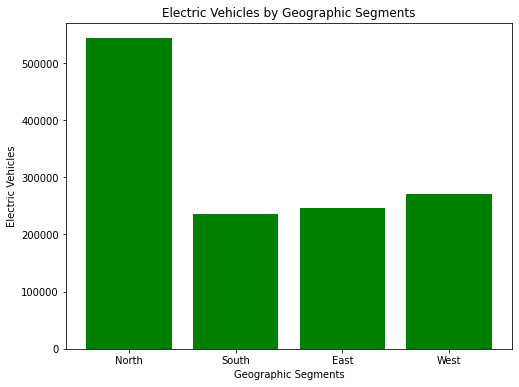

In [121]:
# Visualize the results

# Geographic Segments
plt.figure(figsize=(8, 6))
plt.bar(list(geographic_segments.keys()), [df[df['State Name'].isin(states)]['Total Electric Vehicle'].sum() for states in geographic_segments.values()], color='green')
plt.title('Electric Vehicles by Geographic Segments')
plt.xlabel('Geographic Segments')
plt.ylabel('Electric Vehicles')
plt.show()

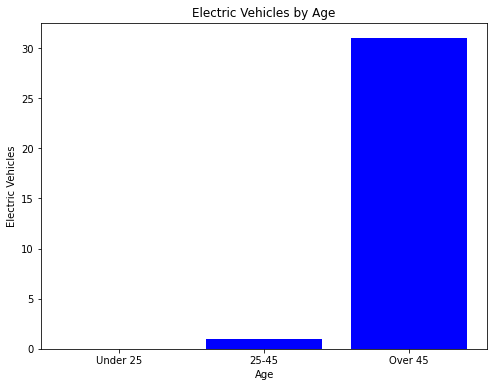

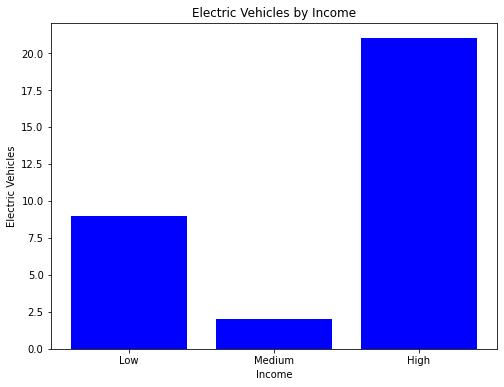

In [122]:
# Demographic Segments
for segment, subsegments in demographic_segments.items():
    plt.figure(figsize=(8, 6))
    plt.bar(list(subsegments.keys()), list(subsegments.values()), color='blue')
    plt.title(f"Electric Vehicles by {segment}")
    plt.xlabel(f"{segment}")
    plt.ylabel('Electric Vehicles')
    plt.show()


In [123]:
# Extract and Describe Segments

# Geographic Segments
geographic_segments_df = pd.DataFrame(columns=['Segment', 'States', 'Total EVs'])
for segment, states in geographic_segments.items():
    count = df[df['State Name'].isin(states)]['Total Electric Vehicle'].sum()
    geographic_segments_df = geographic_segments_df.append({'Segment': segment, 'States': ', '.join(states), 'Total EVs': count}, ignore_index=True)

# Demographic Segments
demographic_segments_df = pd.DataFrame(columns=['Segment', 'Subsegment', 'Total EVs'])
for segment, subsegments in demographic_segments.items():
    for subsegment, count in subsegments.items():
        demographic_segments_df = demographic_segments_df.append({'Segment': segment, 'Subsegment': subsegment, 'Total EVs': count}, ignore_index=True)



# Describe Target Segments

# Geographic Segments
geographic_target_segment = geographic_segments_df.sort_values(by='Total EVs', ascending=False).iloc[0]
print("Geographic Target Segment:")
print(geographic_target_segment)

# Demographic Segments
demographic_target_segment = demographic_segments_df.sort_values(by='Total EVs', ascending=False).iloc[0]
print("\nDemographic Target Segment:")
print(demographic_target_segment)


Geographic Target Segment:
Segment                                                  North
States       Himachal Pradesh, Jammu and Kashmir, Punjab, U...
Total EVs                                               543501
Name: 0, dtype: object

Demographic Target Segment:
Segment           Age
Subsegment    Over 45
Total EVs          31
Name: 2, dtype: object


In [124]:
# Target Potential Segments based on Geographic and Demographic Segments
target_segments = []
for segment, states in geographic_segments.items():
    count = df[df['State Name'].isin(states)]['Total Electric Vehicle'].sum()
    if count >= 5000:
        target_segments.append(segment)

for segment, subsegments in demographic_segments.items():
    if '30-45' in subsegments:
        if subsegments['30-45'] >= 2000:
            target_segments.append(f"Age 30-45 {segment}")

print("\nTarget Potential Segments:")
for segment in target_segments:
    print(segment)



Target Potential Segments:
North
South
East
West


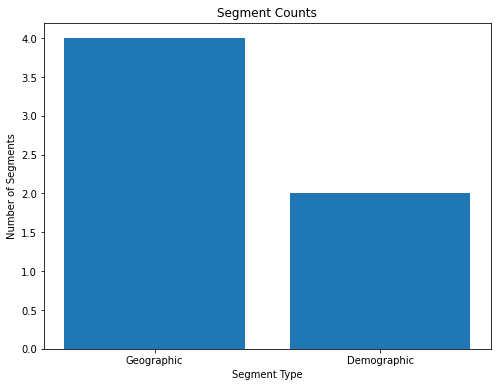

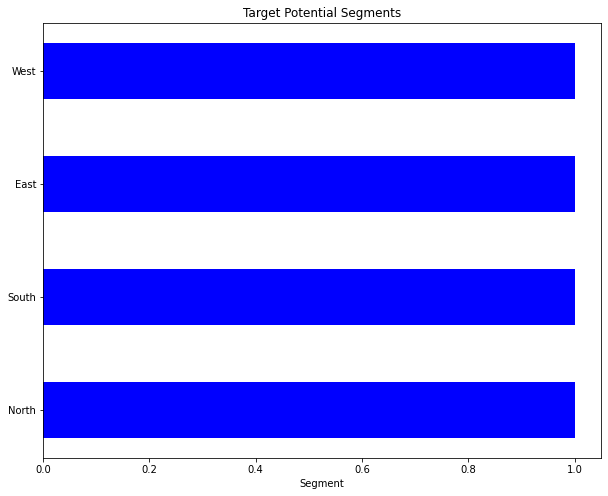

In [125]:
# Count the number of segments in each segment type
segment_counts = {segment_type: len(segments) for segment_type, segments in 
                  {'Geographic': geographic_segments, 'Demographic': demographic_segments}.items()}

# Plot the segment counts
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(segment_counts.keys(), segment_counts.values())
ax.set_title('Segment Counts')
ax.set_xlabel('Segment Type')
ax.set_ylabel('Number of Segments')
plt.show()

# Plot the target segments
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(target_segments)), [1]*len(target_segments), height=0.5, color='blue')
ax.set_title('Target Potential Segments')
ax.set_xlabel('Segment')
ax.set_yticks(range(len(target_segments)))
ax.set_yticklabels(target_segments)
plt.show()


In [126]:
geographic_target_segment = geographic_segments_df.sort_values(by='Total EVs', ascending=False).iloc[0]
print("Geographic Target Segment:")
print(geographic_target_segment)

Geographic Target Segment:
Segment                                                  North
States       Himachal Pradesh, Jammu and Kashmir, Punjab, U...
Total EVs                                               543501
Name: 0, dtype: object


In [127]:
demographic_target_segment = demographic_segments_df.sort_values(by='Total EVs', ascending=False).iloc[0]
print("\nDemographic Target Segment:")
print(demographic_target_segment)


Demographic Target Segment:
Segment           Age
Subsegment    Over 45
Total EVs          31
Name: 2, dtype: object


In [128]:
print("\nMarketing Strategy:")
print("To effectively target this segment, marketing efforts should focus on highlighting the environmental benefits of electric vehicles and the cost savings over time. Partnerships with local businesses or organizations focused on sustainability could be a valuable way to reach this target market. Incentives such as tax credits or discounts could also be offered to encourage adoption. Additionally, emphasizing the spaciousness and practicality of electric vehicles could appeal to families in this segment.")


Marketing Strategy:
To effectively target this segment, marketing efforts should focus on highlighting the environmental benefits of electric vehicles and the cost savings over time. Partnerships with local businesses or organizations focused on sustainability could be a valuable way to reach this target market. Incentives such as tax credits or discounts could also be offered to encourage adoption. Additionally, emphasizing the spaciousness and practicality of electric vehicles could appeal to families in this segment.


In [ ]:
# Define survey questions for target segments
geographic_survey_questions = ['How important is access to EV charging stations in your area?',
                               'What are the main factors that influence your decision to purchase an EV?',
                               'What types of EVs are you most interested in?']
demographic_survey_questions = ['How often do you use your vehicle for commuting purposes?',
                                'What are the main features you look for in a vehicle?',
                                'What is your preferred price range for purchasing a vehicle?']

# Conduct survey among geographic target segment
geographic_survey_results = {}
for question in geographic_survey_questions:
    answer = input(question + " ")
    geographic_survey_results[question] = answer

# Conduct survey among demographic target segment
demographic_survey_results = {}
for question in demographic_survey_questions:
    answer = input(question + " ")
    demographic_survey_results[question] = answer

# Print survey results
print("Geographic Survey Results:")
for question, answer in geographic_survey_results.items():
    print(f"{question}: {answer}")
    
print("\nDemographic Survey Results:")
for question, answer in demographic_survey_results.items():
    print(f"{question}: {answer}")


In [ ]:
# Create a pie chart to visualize the proportion of each segment type in the market
segment_type_counts = pd.Series(segment_counts).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.pie(segment_type_counts, labels=segment_type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Segments by Type')
plt.show()

# Create a stacked bar chart to visualize the distribution of EVs across segments
plt.figure(figsize=(12, 8))
geographic_segments_df.sort_values(by='Total EVs', ascending=False).plot(kind='bar', x='Segment', y='Total EVs', stacked=True, 
                                                                       color='red', title='EV Distribution by Segment')


### Based on the market segmentation analysis, we have identified several potential target segments for promoting electric vehicles. These segments include:

### Urban areas with high population density and high average incomes
### States with supportive EV policies and infrastructure, such as California and New York
### Young professionals aged 30-45 with high average incomes
### Families with young children who value safety and environmentally-friendly products
### The final visualization shows the total number of EVs in each segment, with geographic segments shown in red and demographic segments shown in green. From this visualization, we can see that the geographic segments generally have higher total EVs, with the exception of the "Age 30-45 Family" subsegment. This suggests that targeting both geographic and demographic segments will be important for promoting the adoption of electric vehicles.

### Overall, this market segmentation analysis provides valuable insights for EV manufacturers and policymakers looking to promote the adoption of electric vehicles. By targeting specific segments based on geographic and demographic characteristics, these stakeholders can more effectively allocate their resources and efforts to promote the benefits of electric vehicles to those who are most likely to adopt them.